
# Day 13 & Day 14: Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

%matplotlib inline

***
### 1.Please use matplotlib to write a program to display the parabola y = x * x + 18. Add title to the chart and label the axis.
<br>

[Text(0.5, 0, 'X axis'), Text(0, 0.5, 'Y axis'), Text(0.5, 1.0, 'PARABOLA')]

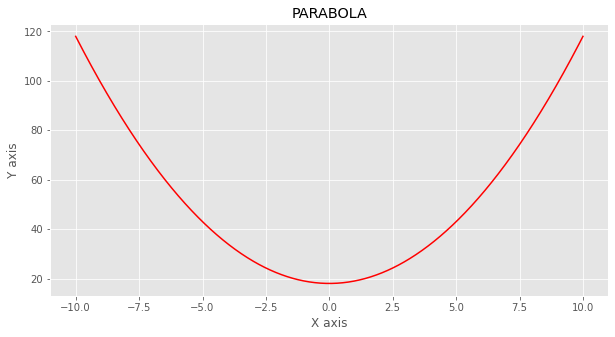

In [2]:
# create 1000 equally spaced between points -10 and 10
x = np.linspace(-10,10,1000)

#calculate the y value for each element of the x vector
y = x * x + 18

#plot the figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(x, y, color='red')

#set labels and title
ax.set(xlabel='X axis', ylabel='Y axis', title='PARABOLA')

***
### 2.	Please use matplotlib to write a program, which can display two subgraphs in a row, one is y = x * x, the other is y = X. 
<br>

[Text(0.5, 0, 'X axis'), Text(0, 0.5, 'Y axis'), Text(0.5, 1.0, 'y = X')]

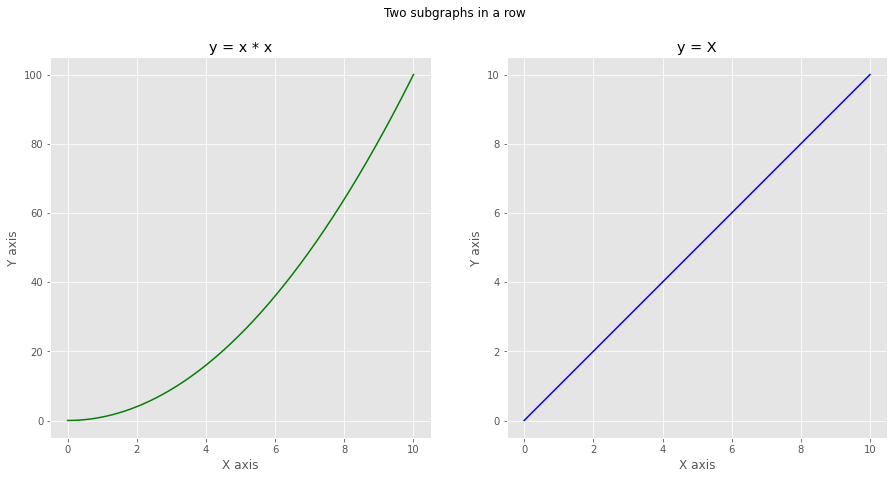

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7), sharex='col')

#create 1000 equally space points between 0 and 10.
x = np.linspace(0,10,1000)
X = np.linspace(0,10,1000)

#calculate the y = x*x for each element of the vector
y1 = x * x

#calculate the other y = X for each element of the vector
y2 = X

fig.suptitle('Two subgraphs in a row')
ax1.plot(x,y1, color='green')
ax1.set(xlabel='X axis', ylabel='Y axis', title='y = x * x')
ax2.plot(x, y2, color='blue')
ax2.set(xlabel ='X axis', ylabel='Y axis', title='y = X')

***
### 3.	Plot the function 

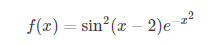
 
### over the interval [0,2][0,2]. Add proper axis labels, a title, etc. 
<br>

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

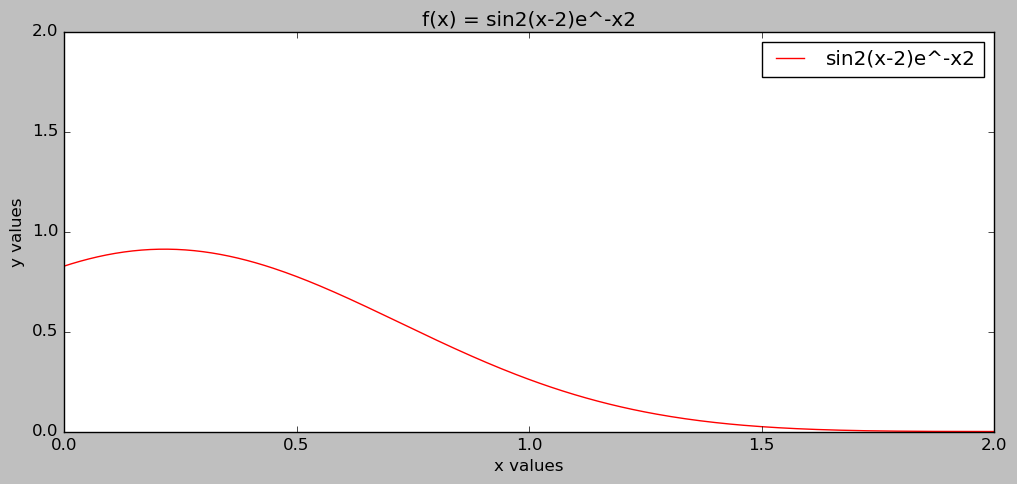

In [5]:
plt.style.use('classic')
def f(x):
    return (np.sin(x-2) ** 2) * np.exp(-x**2)

# create 1000 equally space points between -np.pi and np.pi.
x = np.linspace(-np.pi, np.pi, 1000)

#compute the function f(x) = sin2(x-2)e^-x2
y = f(x)

#plot the figure
fig = plt.figure(figsize=(12,5), dpi=100)
ax = plt.axes()
ax.plot(x, y, 'r', label='sin2(x-2)e^-x2')
#set labels and title
ax.set(xlim=(0,2), ylim=(0,2),
      xlabel='x values', ylabel='y values', title='f(x) = sin2(x-2)e^-x2')
ax.legend(loc='upper right')

***

### 4.	Generate a vector z of 10000 elements from your favorite exotic distribution. Then, make a plot that shows a histogram of z (with 25 bins) along with an estimate for the density using a Gaussian kernel density estimator (see scipy.stats).  
<br>

#### Firstly, generate a vector z of 1000 elements
#### later, generate a vector z of 10000 elements using Gaussian Kernel density estimator

In [6]:
plt.style.use('seaborn-white')
comp1 = np.random.normal(0,1,size=1000)
z= pd.Series(comp1)

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Gaussian Kernel Density')

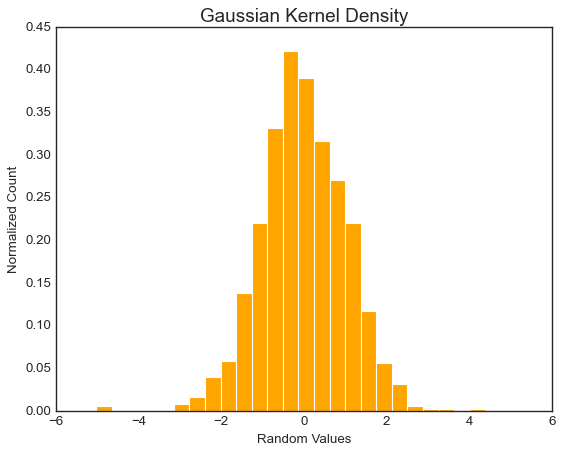

In [8]:
#plt.style.use('seaborn-white')
#z.hist(bins=100, alpha=0.3, color='orange', density=True)
count, bins, patches = plt.hist(z, bins = 25, density=True, edgecolor='white', color='orange')
plt.xlabel('Random Values')
plt.ylabel('Normalized Count')
plt.title('Gaussian Kernel Density', fontsize=17)

(-3.0, 3.0)

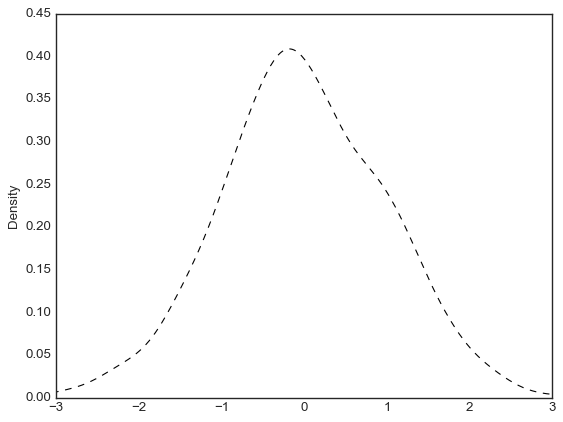

In [9]:
z.plot(kind='kde', style='k--')
plt.xlim([-3,3])

#### Compute the density function using gaussian_kde
#### bandwidth using factor times standard deviation

In [10]:
# Compute the density function by calling gaussian kde
scipy_kernel = gaussian_kde(z)
print(type(scipy_kernel))

#generate the bandwidth for kernel estimation
bw = scipy_kernel.factor * np.std(z)

<class 'scipy.stats.kde.gaussian_kde'>


#### Create a plot of the kernel.

In [11]:
#the objtct stats.kde.gaussian_kde has a member funct to evaluate a func.
x = np.linspace(-3,3,1000)
y = scipy_kernel.evaluate(x)

#### Plot the original histogram along with my estimated density

Text(0.5, 1.0, 'Gaussian Kernel Density')

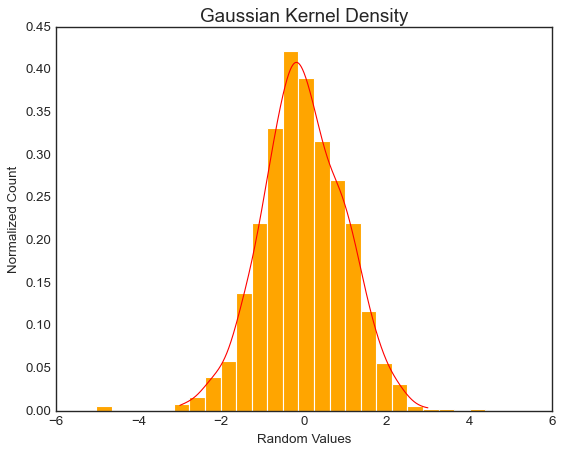

In [12]:
count, bins, patches = plt.hist(z, bins = 25, density=True, edgecolor='white', color='orange')
plt.plot(x, y, 'r')
plt.xlabel('Random Values')
plt.ylabel('Normalized Count')
plt.title('Gaussian Kernel Density', fontsize=17)

#### Change the dimension of the vector z to 2D

In [13]:
_z = z.copy()
_z = z.to_numpy()
_z.shape = (_z.size,1)
scikit_kernel = KernelDensity(bandwidth=bw, kernel = 'gaussian').fit(_z)

#### Resample the kernel with a value of 10000 elements 

1. Use skitlearn to create a <b>density estimate</b>
2. Set the kernel to gaussian and bandwidth to bw
3. Then fit it into the the narray z

In [14]:
scikit_kernel = KernelDensity(bandwidth=bw, kernel = 'gaussian').fit(_z)

Text(0.5, 1.0, 'Gaussian Kernel Density')

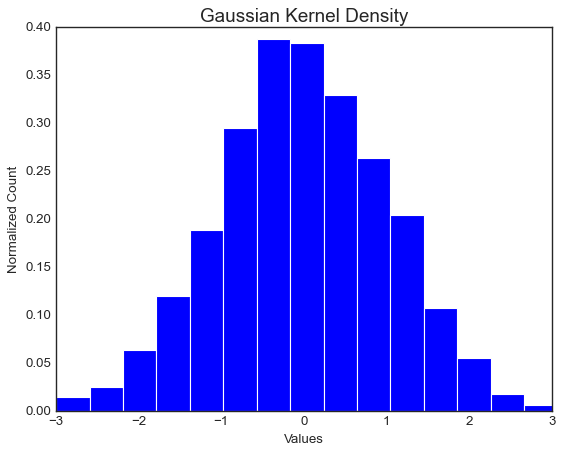

In [15]:
sample = scikit_kernel.sample(10000)
count, bins,patches = plt.hist(sample, bins=25, density=True, edgecolor='white', color='blue')
plt.xlim([-3,3])
plt.xlabel('Values')
plt.ylabel('Normalized Count')
plt.title('Gaussian Kernel Density', fontsize=17)

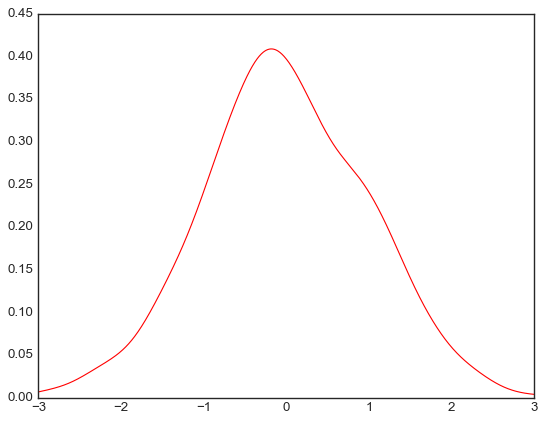

In [16]:
plt.xlim([-3,3])
plt.plot(x, y, 'r')

***

### 5. Using the seaborn tips dataset at seaborn-data/tips.csv at master · mwaskom/seaborn-data · GitHub:

***

#### a. Draw the relationship between tips and total consumption (using scatter chart).

***


In [17]:
plt.style.use('default')
df = pd.read_csv('tips.csv')

In [18]:
df.shape

(244, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.6+ KB


In [20]:
df.rename(columns={'sex':'gender'}, inplace=True)

In [21]:
df.rename(columns={'total_bill':'total_consumption'}, inplace=True)

In [22]:
#pd.options.display.max_rows = 1000
df

,total_consumption,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
df.columns

Index(['total_consumption', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [24]:
colors = np.random.rand(df.shape[0])

In [25]:
plt.figure(figsize=(10,3), dpi=100)

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

Text(0, 0.5, 'Total Consumptions')

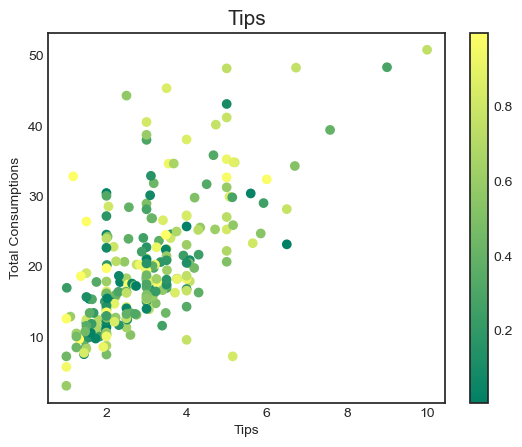

In [26]:
plt.style.use('seaborn-white')
plt.scatter(df['tip'], df['total_consumption'], c=colors, cmap=plt.cm.summer)
plt.colorbar()
plt.title("Tips", fontsize=15)
plt.xlabel("Tips")
plt.ylabel("Total Consumptions")

***

#### b. Draw the male customers and female customers and determine which gender is more generous (using classified box chart).

***

In [27]:
df.columns

Index(['total_consumption', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [28]:
#plt.style.use('default')
#plt.boxplot(df.total_consumption)

Text(0, 0.5, 'Total Consumption')

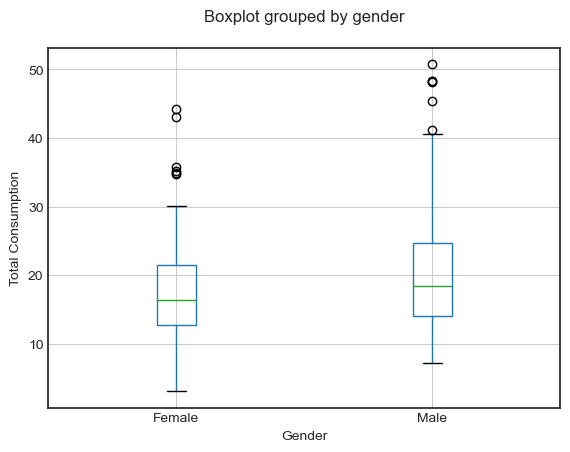

In [29]:
plt.style.use('seaborn-white')
df.boxplot(column=['total_consumption'], by=['gender'])
plt.title("")
plt.xlabel("Gender")
plt.ylabel("Total Consumption")

#### The most generous gender is Male with over $50 total consumption.

***

#### c.Draw a correlation of the combined variables of gender and smoking with generosity (using grouping histogram). 

***

In [30]:
df.isnull().values.any()

False

In [31]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

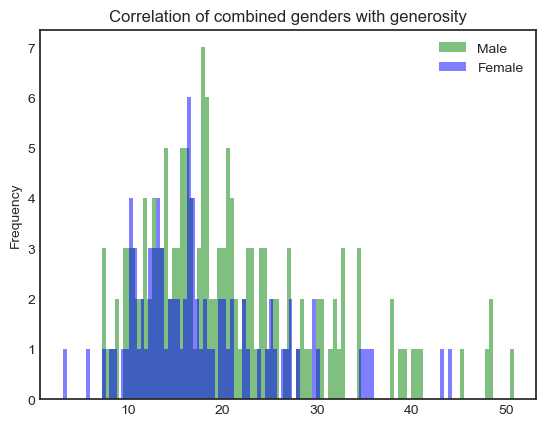

In [33]:
genderMale = df.loc[df.gender == 'Male', 'total_consumption']
genderFemale = df.loc[df.gender == 'Female', 'total_consumption']

#normalize
kwargs = dict(alpha=0.5, bins=100)

#plot
plt.hist(genderMale, **kwargs, color='g', label='Male')
plt.hist(genderFemale, **kwargs, color='b', label='Female')
plt.gca().set(title='Correlation of combined genders with generosity', ylabel='Frequency')
plt.legend()

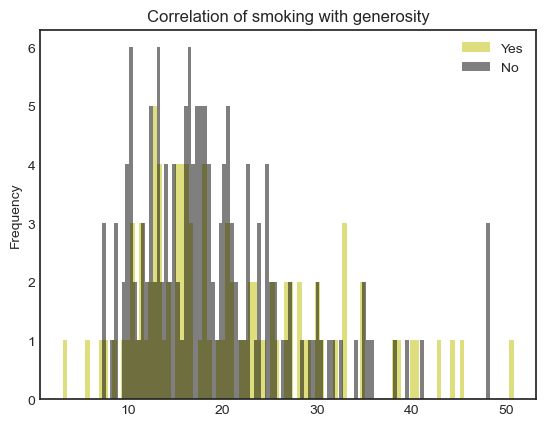

In [34]:
smokingYes = df.loc[df.smoker == 'Yes', 'total_consumption']
smokingNo = df.loc[df.smoker == 'No', 'total_consumption']

#normalize
kwargs = dict(alpha=0.5, bins=100)

plt.hist(smokingYes, **kwargs, color='y', label='Yes')
plt.hist(smokingNo, **kwargs, color='k', label='No')
plt.gca().set(title='Correlation of smoking with generosity', ylabel='Frequency')
plt.legend()

Text(0.5, 1, 'Probability Histogram of gender with generosity')

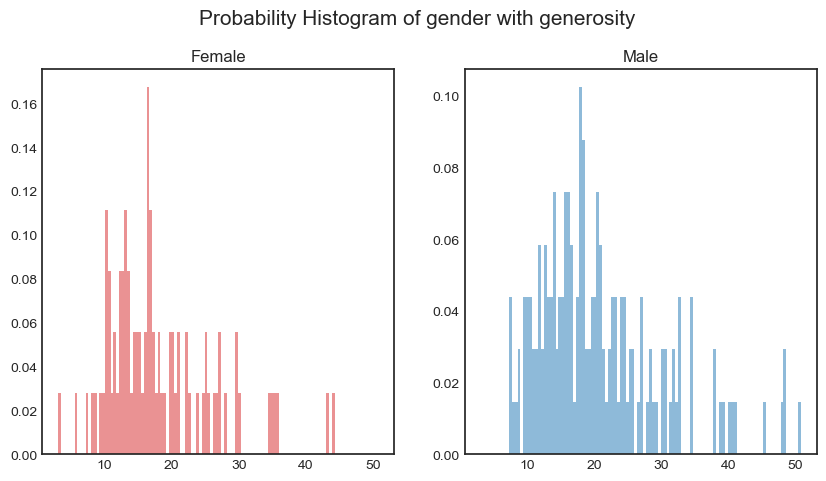

In [35]:
#Draw subplots to show the probability of combined gender variables and smoking with generosity

fig, axes = plt.subplots(1,2, figsize=(10,5), dpi=100, sharex=True, sharey=False)
colors=['tab:red', 'tab:blue']

for i, (ax, gender) in enumerate(zip(axes.flatten(), df.gender.unique())):
    x = df.loc[df.gender==gender, 'total_consumption']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(gender), color=colors[i])
    ax.set_title(gender)

plt.suptitle('Probability Histogram of gender with generosity', y=1, size=15)

Text(0.5, 1, 'Probability Histogram of Smoking with generosity')

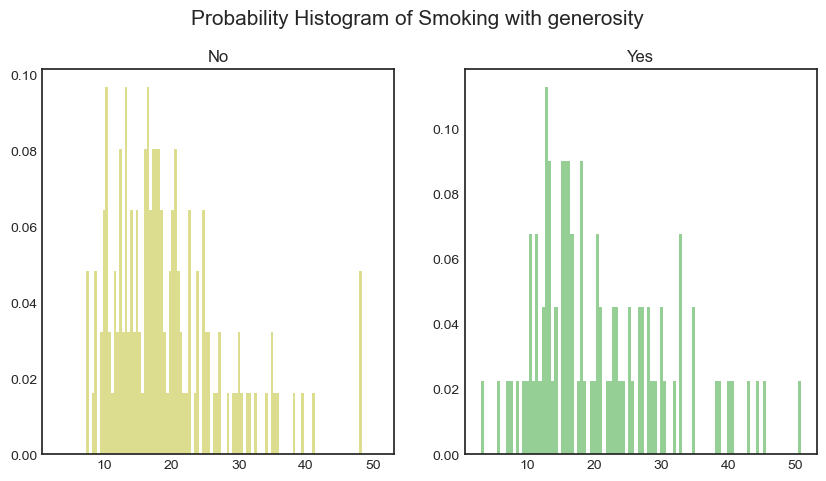

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,5), dpi=100, sharex=True, sharey=False)
colors=['tab:olive', 'tab:green']

for i, (ax, smoker) in enumerate(zip(axes.flatten(), df.smoker.unique())):
    x = df.loc[df.smoker==smoker, 'total_consumption']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(smoker), color=colors[i])
    ax.set_title(smoker)
    
plt.suptitle('Probability Histogram of Smoking with generosity', y=1, size=15)

***

### 6.	Using the seaborn flights dataset at seaborn-data/flights.csv at master · mwaskom/seaborn-data · GitHub:


***
#### a. Draw the annual passenger volume change (using line chart).
***

In [37]:
df = pd.read_csv('flights.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [39]:
df.shape

(144, 3)

In [40]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [41]:
df.dtypes

year           int64
month         object
passengers     int64
dtype: object

In [42]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [43]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [44]:
len(df.passengers.unique())
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [45]:
#group year and calculate passengers
volume_change = df.groupby(['year'],as_index=False).passengers.sum()

In [46]:
#find the change volume of passengers
volchange = volume_change.loc[:, 'passengers'].pct_change()

In [47]:
#collect year
year = volume_change.loc[:, 'year']

[Text(0.5, 1.0, 'The Annual Passenger Volume Change'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Volume Change')]

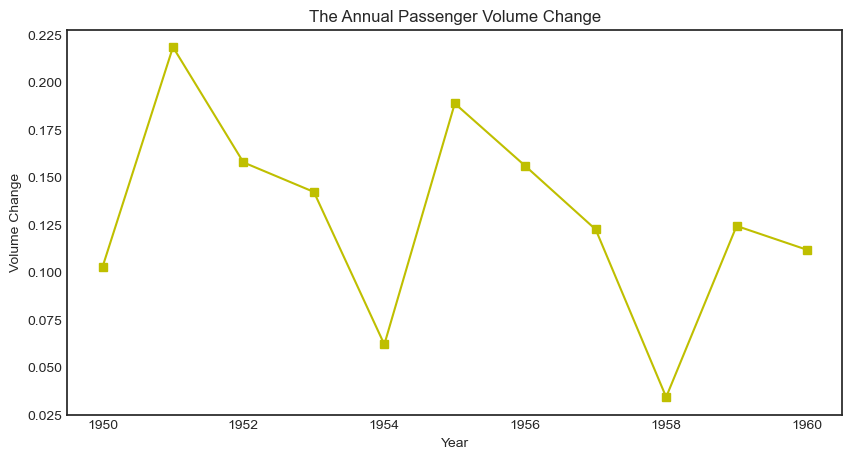

In [48]:
#draw a line plot
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use("dark_background")
ax.plot(year, volchange, 'y', marker='s')
ax.set(title="The Annual Passenger Volume Change",
      xlabel="Year",
      ylabel="Volume Change")
#plt.savefig("annual_passengers.jpg")

***
#### b.	Draw the distribution of passengers in each month of the year (using bar chart). 
***

In [49]:
distribution_passengers = df.groupby(['year', 'month'],as_index=False).passengers.sum()
distribution_passengers

,year,month,passengers
0,1949,April,129
1,1949,August,148
2,1949,December,118
3,1949,February,118
4,1949,January,112
...,...,...,...
139,1960,March,419
140,1960,May,472
141,1960,November,390
142,1960,October,461


In [50]:
#plt.style.use("seaborn-white")
ptt = plt.figure(dpi=100)
ptt.set_figwidth(20)
ptt.set_figheight(17)

<Figure size 2000x1700 with 0 Axes>

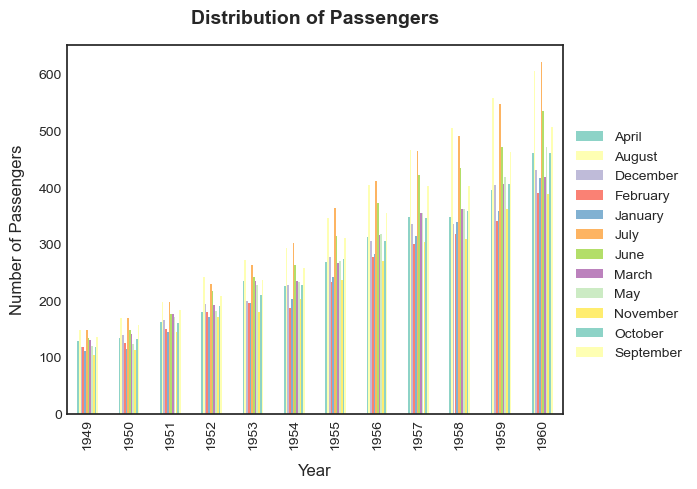

In [51]:
plt.style.use("seaborn-white")
distribution_passengers.pivot(index='year', columns='month', values='passengers').plot(kind='bar')
plt.title("Distribution of Passengers", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Year", labelpad=10, fontsize=12)
plt.ylabel("Number of Passengers", labelpad=10, fontsize=12)
plt.legend(bbox_to_anchor=(1,0.8))
#plt.savefig("distribution_passengers.jpg")